This dataset contains information about used cars.\
\
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.\
\
The columns in the given dataset are as follows:

name\
year\
selling_price\
km_driven\
fuel\
seller_type\
transmission\
Owner\

More information can be found in Kaggle Website:https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

1. created a new anaconda environment-car prediction 3.7 python
2. working directory(launched jupyter notebook)


In [41]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car_data=pd.read_csv('car data.csv')

In [3]:
car_data


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
#performing basic exploration of the data
car_data.shape

(301, 9)

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
print(car_data['Seller_Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [17]:
#checking missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [19]:
#creating derived features
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
car_data_v1=car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [25]:
car_data_v1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
car_data_v1['Current_year']=2020

In [27]:
car_data_v1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [28]:
#creating the derived year feature
car_data_v1['num_years']=car_data_v1['Current_year']-car_data_v1['Year']

In [29]:
car_data_v1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,num_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [34]:
final_df=pd.get_dummies(car_data_v1,drop_first=True)

In [35]:
final_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,NaN,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_years,-1.000000,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240


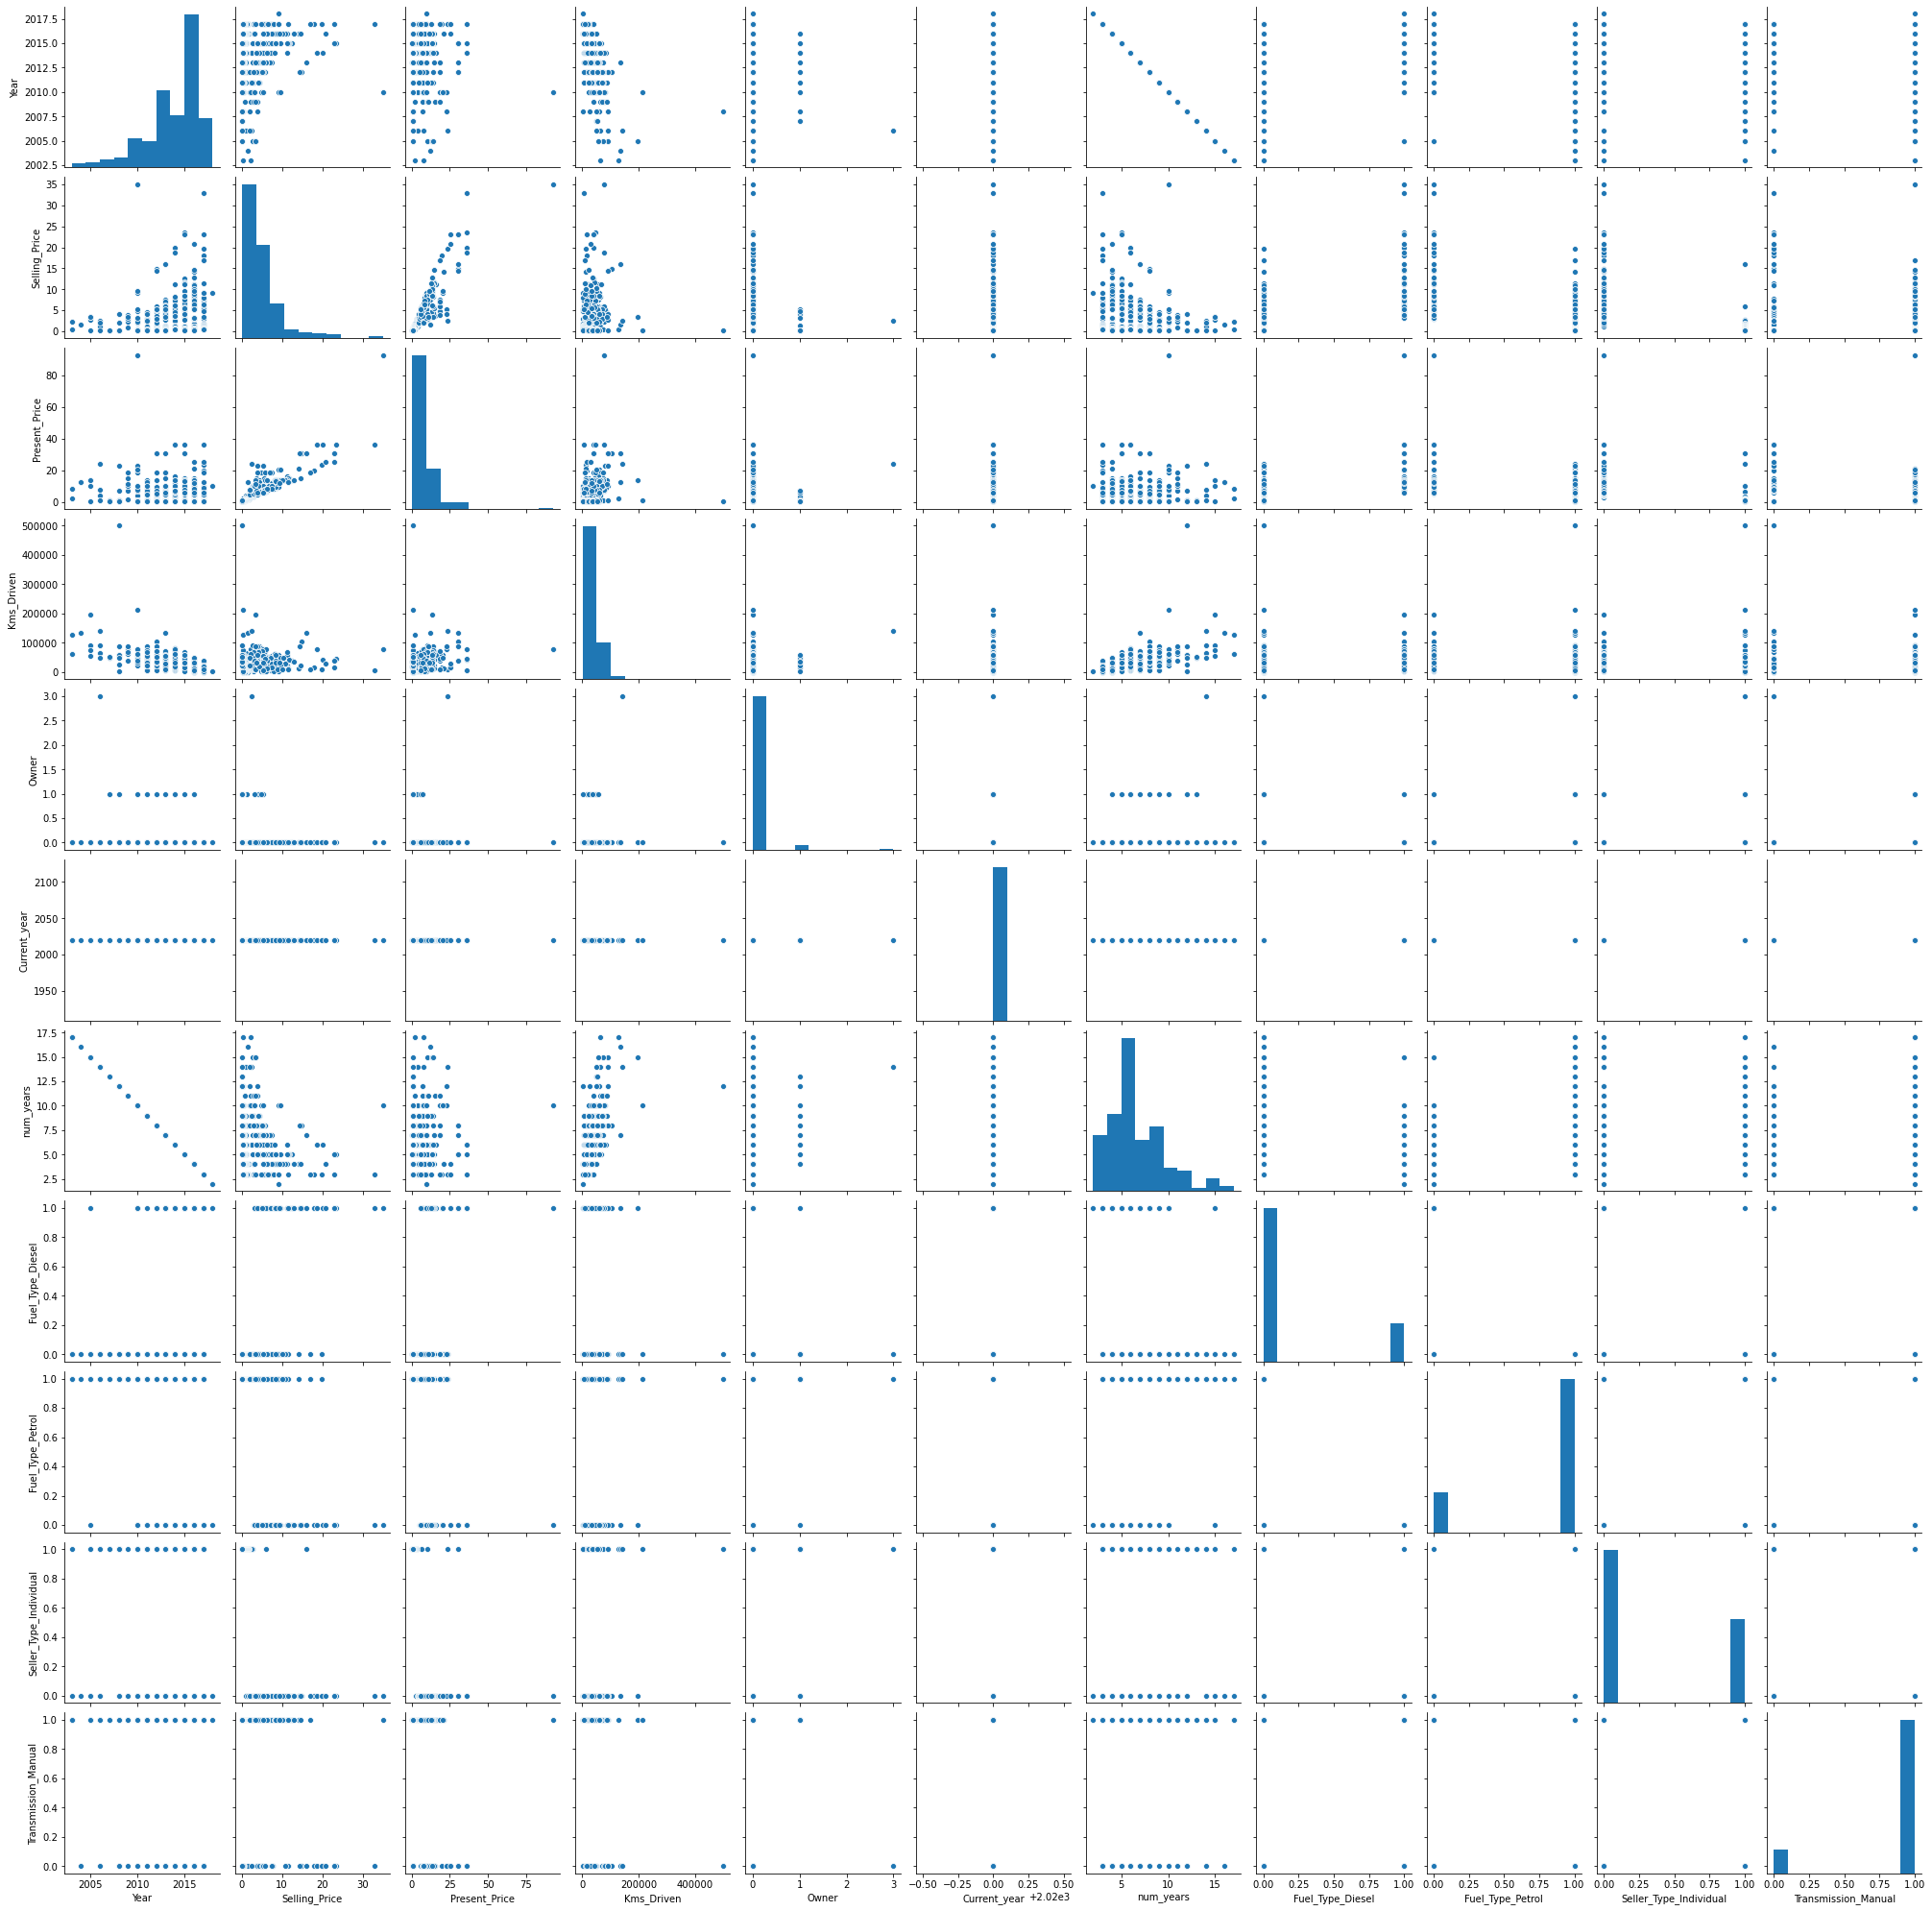

In [37]:
sns.pairplot(final_df)

In [44]:
final_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Current_year', 'num_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

<AxesSubplot:>

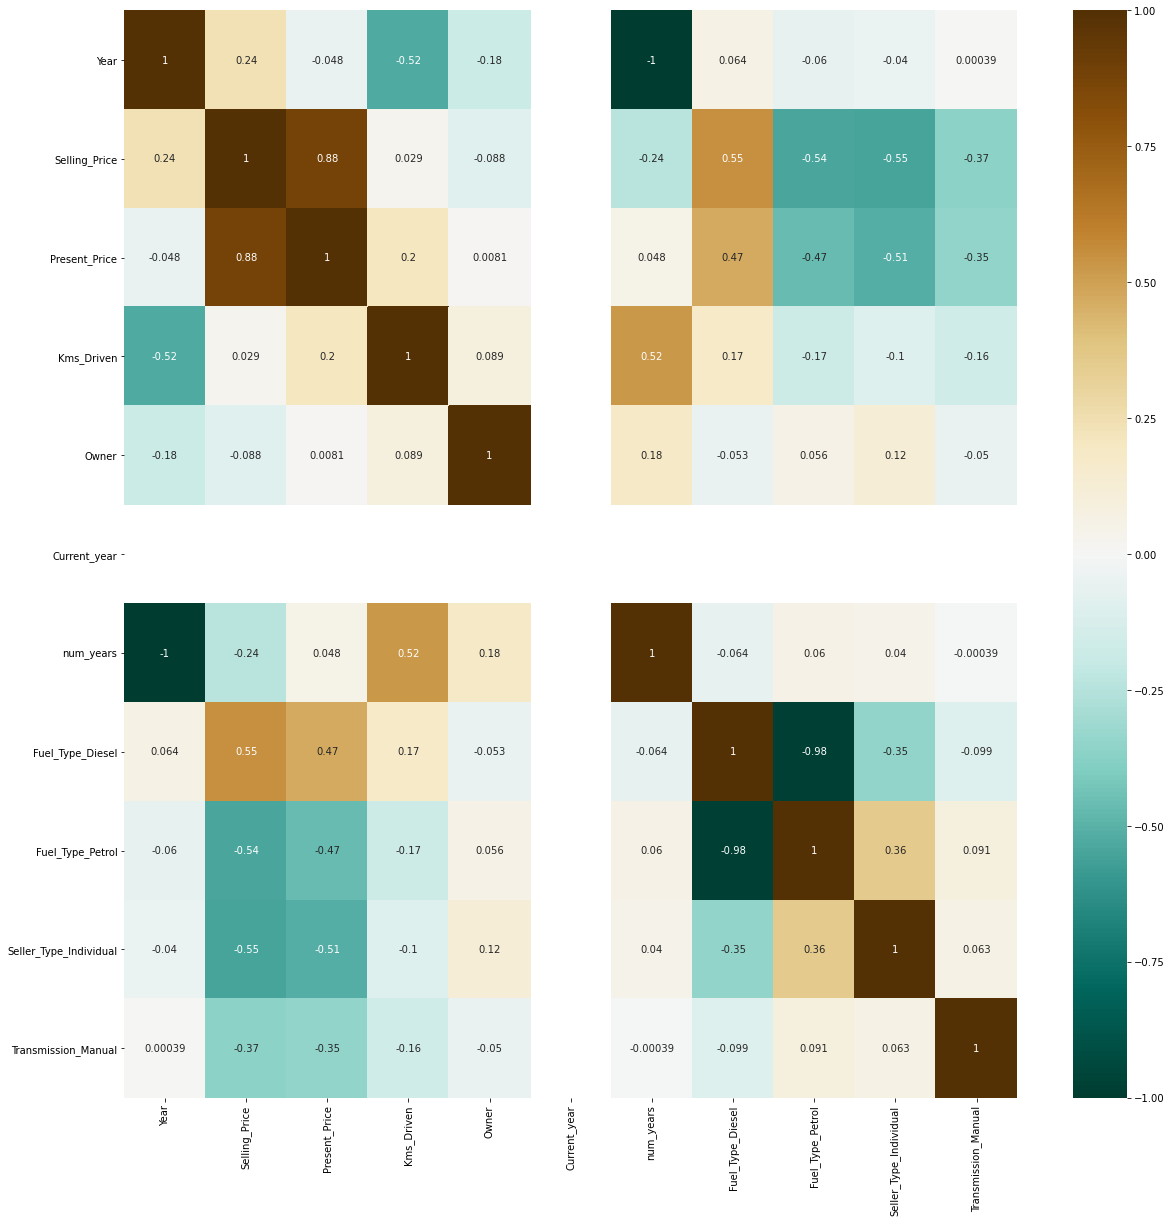

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,cmap='BrBG_r')

In [50]:
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,2020,6,0,1,0,1
1,2013,4.75,9.54,43000,0,2020,7,1,0,0,1
2,2017,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2011,2.85,4.15,5200,0,2020,9,0,1,0,1
4,2014,4.60,6.87,42450,0,2020,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2020,4,1,0,0,1
297,2015,4.00,5.90,60000,0,2020,5,0,1,0,1
298,2009,3.35,11.00,87934,0,2020,11,0,1,0,1
299,2017,11.50,12.50,9000,0,2020,3,1,0,0,1


In [77]:
final_df.iloc[:,1:]

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,2020,4,1,0,0,1
297,4.00,5.90,60000,0,2020,5,0,1,0,1
298,3.35,11.00,87934,0,2020,11,0,1,0,1
299,11.50,12.50,9000,0,2020,3,1,0,0,1


In [102]:
X=final_df.iloc[:,2:]
Y=final_df.iloc[:,1]

In [103]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [104]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [105]:
print(model.feature_importances_)

[3.75380960e-01 4.09199048e-02 3.67854559e-04 0.00000000e+00
 7.50118269e-02 2.38280417e-01 9.52285296e-03 1.32300478e-01
 1.28215705e-01]


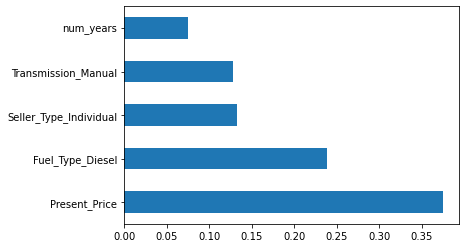

In [106]:
#plot the important features
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [110]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [125]:
#import random forest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [118]:
#Hyperparameters
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=120,num=10)]
#number of features to consider in every split
max_features=['auto','sqrt']
#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split the node
min_samples_split=[2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [119]:
# hyperparameter tuning using the randomized search CV
from sklearn.model_selection import RandomizedSearchCV


In [122]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
random_grid

{'n_estimators': [100, 102, 104, 106, 108, 111, 113, 115, 117, 120],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [126]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42,verbose=2)

In [129]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=108, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=108, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=108, min_samples_split=100, mi

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=104, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=104, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=104, min_samples_split=15, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 102, 104, 106,
                                                         108, 111, 113, 115,
                                                         117, 120]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [132]:
prediction=rf_random.predict(X_test)

In [134]:
prediction

array([10.68644921,  6.62214266,  5.4508002 ,  3.38457163,  5.03285437,
        4.41016434,  5.19684345,  4.06735462,  0.42633685,  0.22502107,
        8.45179634,  0.89068266,  1.03445848,  8.41088079,  0.61721706,
       10.13062115,  4.37902627,  2.44558869, 21.60136955,  5.21443608,
        5.34412857,  4.6075629 ,  3.00958254,  4.43117339,  1.51851548,
        0.44450185,  0.5130476 ,  7.10401944,  6.80094821,  0.6254731 ,
        1.2070723 ,  9.93581381,  4.52414206,  0.5431125 ,  0.53580324,
        7.06469905,  7.53115453,  5.40284187,  4.95941286,  5.18941488,
       22.93009693,  4.87630615,  3.08955952,  3.01391587,  6.80502163,
        0.55212968,  3.1523244 ,  4.47533696, 10.57463353,  0.32444723,
        9.47672611,  0.19749655,  0.40841595,  6.77076369,  2.8146881 ,
       20.16355039,  3.18713826,  0.51553094,  5.05264742,  4.63994661,
        6.4974871 ])

<AxesSubplot:xlabel='Selling_Price'>

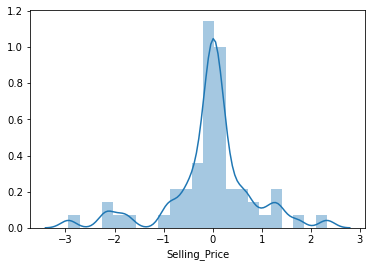

In [136]:
sns.distplot(y_test-prediction)

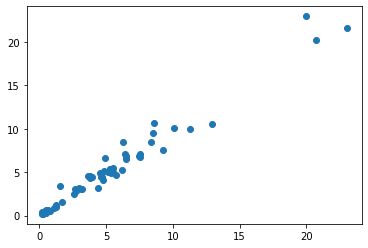

In [137]:
plt.scatter(y_test,prediction)

In [138]:
import pickle
file=open('random_forest_regression_model','wb')
pickle.dump(rf_random,file)